In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Simulation via the CDF ##

How do you generate a random variable that has a specified distribution? The answer is quite remarkable and is used by computational systems to generate values of random variables whose distribution you have specified.

Our goal is to generate a value of a random variable that has a particular distribution. Let $F$ denote the cdf of that distribution. We will construct a process to acheive our goal in the special case where the cdf $F$ of the specified distribution is continuous and strictly increasing on the real number line. However, if you are more careful with the proof you can show that the result is true for any cdf $F$.

The statement below describes the process. Note that because we have assumed $F$ is continuous and strictly increasing, it has an inverse function.

- Generate $U$, a uniform $(0, 1)$ random variable.
- Create a random variable $X$ by the formula $X = F^{-1}(U)$.

Done! The random variable $X$ will have your specified cdf $F$.

To prove the result, remember that the cdf $F_U$ of $U$ is given by $F_U(u) = u$ for $0 < u < 1$. Let $x$ be any number. Our goal is to show that $F_X(x) = F(x)$.

$$
\begin{align*}
F_X(x) ~ &= ~ P(X \le x) \\
&= ~ P(F^{-1}(U) \le x) \\
&= ~ P(U \le F(x)) ~~~~ \mbox{because } F \mbox{ is increasing} \\
&= ~ F_U(F(x)) \\
&= ~ F(x)
\end{align*}
$$

This is an extremely important result for computation as well as theory. It says that computing systems should pay great attention to the quality of their uniform $(0, 1)$ random number generator. After that, all they have to do is apply the deterministic (that is, non-random) function $F^{-1}$, and they will have generated a random variable that has cdf $F$.

For example, here is a way to generate a normal $(\mu, \sigma^2)$ random variable.

- Start with $U$ that has the uniform $(0, 1)$ distribution.
- By our result above, $Z = \Phi^{-1}(U)$ has the standard normal distribution.
- By linear transformation facts, $X = \sigma Z + \mu$ has the normal $(\mu, \sigma^2)$ distribution.

Here is the plan in action, in the case $\mu = 10$ and $\sigma^2 = 25$. Note that `stats.uniform.rvs` generates uniform $(0, 1)$ random numbers, known as *random variates*. The argument `size` specifies how many numbers to generate.

In [2]:
uniforms = stats.uniform.rvs(size=10000)
standard_normals = stats.norm.ppf(uniforms)
normal_10_25 = 5*standard_normals + 10

results = Table().with_columns(
    'Uniform (0, 1)', uniforms,
    'Standard Normal', standard_normals,
    'Normal (10, 25)', normal_10_25
)

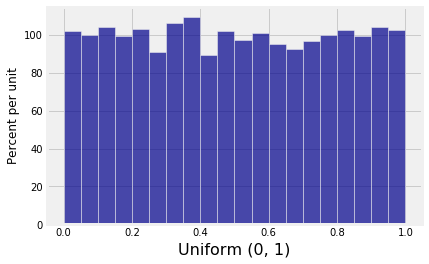

In [3]:
results.hist('Uniform (0, 1)', bins=20)

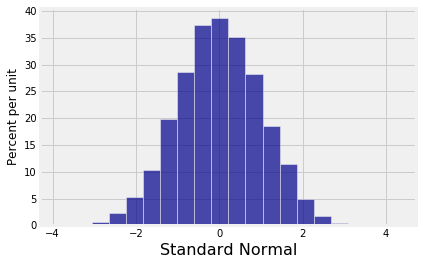

In [4]:
results.hist('Standard Normal', bins=20)

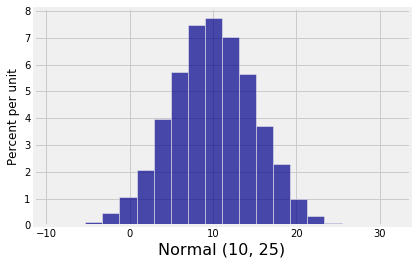

In [5]:
results.hist('Normal (10, 25)', bins=20)

You can repeat the process for any distribution you want to simulate.

For example, to generate random variables whose density is $f(r) = 2r$ for $r \in (0, 1)$, first find the corresponding cdf by integrating:

- $F(x) = x^2$ for $x \in (0, 1)$

Then find the inverse of $F$. Remember that $F(x) = x^2$ is a continuous increasing function on $(0, 1)$, though it is two-to-one on the whole real line.

- For $y \in (0, 1)$, $F^{-1}(y) = \sqrt{y}$

Then apply $F^{-1}$ to a uniform $(0, 1)$ random variable $U$:

- $X = \sqrt{U}$ has the specified density $f$.

Here is the plan in action, using the uniform random numbers generated above.

In [6]:
results = results.with_columns(
    'Density f(r)=2r on (0, 1)', uniforms ** 0.5

)

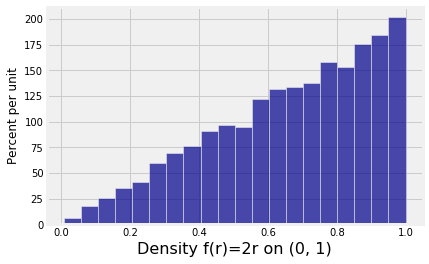

In [7]:
results.hist('Density f(r)=2r on (0, 1)', bins=20)